# First, i requested the data from the api, using only 1 url and 1 miles raduoirs of lat and lng which was in the centre of birmingham. - was able create the data and graphs and maps to show what crimes has happned, however this was only restired to one month - over our task was to look over a prioed from 2020-01 to 2020-12. however the api reuqtesed was not working in range which i then extred the cvs download form. below are the steps 

In [2]:
#varblies and definng the URFL 
import csv
import json
import pandas as pd
import requests
import re 
import numpy as np
import matplotlib.pyplot as plt
import folium
from pandas.io.json import json_normalize
import urllib
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# using only 1 month - 2020-01

In [3]:
response = requests.get("https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-01").json()
print(response)

[{'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.475308', 'street': {'id': 1255796, 'name': 'On or near Arsenal Street'}, 'longitude': '-1.863434'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 80681826, 'location_subtype': '', 'month': '2020-01'}, {'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.475316', 'street': {'id': 1255951, 'name': 'On or near Nightclub'}, 'longitude': '-1.898415'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 80680682, 'location_subtype': '', 'month': '2020-01'}, {'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.475448', 'street': {'id': 1255888, 'name': 'On or near Further/higher Educational Building'}, 'longitude': '-1.885768'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 80681830, 'location_subtype': '', 'month': '2020-01'}, {'category': 'anti-social-behaviour', 'lo

In [4]:
#Creating the Dataframe 
df = pd.DataFrame(response)
df.head()

,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month
0,anti-social-behaviour,Force,"{'latitude': '52.475308', 'street': {'id': 125...",,None,,80681826,,2020-01
1,anti-social-behaviour,Force,"{'latitude': '52.475316', 'street': {'id': 125...",,None,,80680682,,2020-01
2,anti-social-behaviour,Force,"{'latitude': '52.475448', 'street': {'id': 125...",,None,,80681830,,2020-01
3,anti-social-behaviour,Force,"{'latitude': '52.491832', 'street': {'id': 125...",,None,,80681833,,2020-01
4,anti-social-behaviour,Force,"{'latitude': '52.489535', 'street': {'id': 125...",,None,,80681853,,2020-01


In [5]:
#Creating the normalize Dataframe 
df_final = pd.json_normalize(response, max_level=1)
df_final.head()

,category,location_type,context,outcome_status,persistent_id,id,location_subtype,month,location.latitude,location.street,location.longitude,outcome_status.category,outcome_status.date
0,anti-social-behaviour,Force,,NaN,,80681826,,2020-01,52.475308,"{'id': 1255796, 'name': 'On or near Arsenal St...",-1.863434,NaN,NaN
1,anti-social-behaviour,Force,,NaN,,80680682,,2020-01,52.475316,"{'id': 1255951, 'name': 'On or near Nightclub'}",-1.898415,NaN,NaN
2,anti-social-behaviour,Force,,NaN,,80681830,,2020-01,52.475448,"{'id': 1255888, 'name': 'On or near Further/hi...",-1.885768,NaN,NaN
3,anti-social-behaviour,Force,,NaN,,80681833,,2020-01,52.491832,"{'id': 1258672, 'name': 'On or near Shopping A...",-1.889599,NaN,NaN
4,anti-social-behaviour,Force,,NaN,,80681853,,2020-01,52.489535,"{'id': 1258747, 'name': 'On or near Wardlow Ro...",-1.876277,NaN,NaN


In [6]:
#sumar clean data frame 
month = df_final ['month']
category = df_final ['category']
location_type = df_final ['location_type']
outcome_status = df_final ['outcome_status.category']
date_of_outcome_status = df_final ['outcome_status.date']
latitude = df_final ['location.latitude']
longitude = df_final ['location.longitude']

summary_table_df = pd.DataFrame({"Month": month, "Category": category, "Location_type": location_type, "Latitude": latitude, "Longitude": longitude, "Outcome_status": outcome_status, "date_of_outcome_status": date_of_outcome_status})
summary_table_df

,Month,Category,Location_type,Latitude,Longitude,Outcome_status,date_of_outcome_status
0,2020-01,anti-social-behaviour,Force,52.475308,-1.863434,NaN,NaN
1,2020-01,anti-social-behaviour,Force,52.475316,-1.898415,NaN,NaN
2,2020-01,anti-social-behaviour,Force,52.475448,-1.885768,NaN,NaN
3,2020-01,anti-social-behaviour,Force,52.491832,-1.889599,NaN,NaN
4,2020-01,anti-social-behaviour,Force,52.489535,-1.876277,NaN,NaN
...,...,...,...,...,...,...,...
1334,2020-01,other-crime,Force,52.483135,-1.895820,Status update unavailable,2020-05
1335,2020-01,other-crime,Force,52.479343,-1.898111,Unable to prosecute suspect,2020-04
1336,2020-01,other-crime,Force,52.479273,-1.899834,Court result unavailable,2020-07
1337,2020-01,other-crime,Force,52.483726,-1.892918,Unable to prosecute suspect,2020-02


In [7]:
# the number of crimes in 1 mile radus of birmingham.
Number_of_crime= len(df["category"])
Number_of_crime

1339

In [8]:
# the number of types of crimes in 1 mile radus of birmingham.
Number_of_type_of_crime= len(df["category"].unique())
Number_of_type_of_crime

14

the number of types of crimes in 1 mile radus of birmingham.
Number_of_type_of_outcome = len(df["outcome_status"].unique())
Number_of_type_of_outcome

In [9]:
# the number of types of crimes in 1 mile radus of birmingham. IN DATA FORMATE
crime_count = summary_table_df["Category"].value_counts()
crime_count

violent-crime            353
shoplifting              192
anti-social-behaviour    138
vehicle-crime            130
other-theft              110
robbery                   83
theft-from-the-person     81
public-order              77
criminal-damage-arson     67
burglary                  43
drugs                     32
possession-of-weapons     13
other-crime               12
bicycle-theft              8
Name: Category, dtype: int64

Text(0.5, 1.0, 'Number of Crime per Crime type')

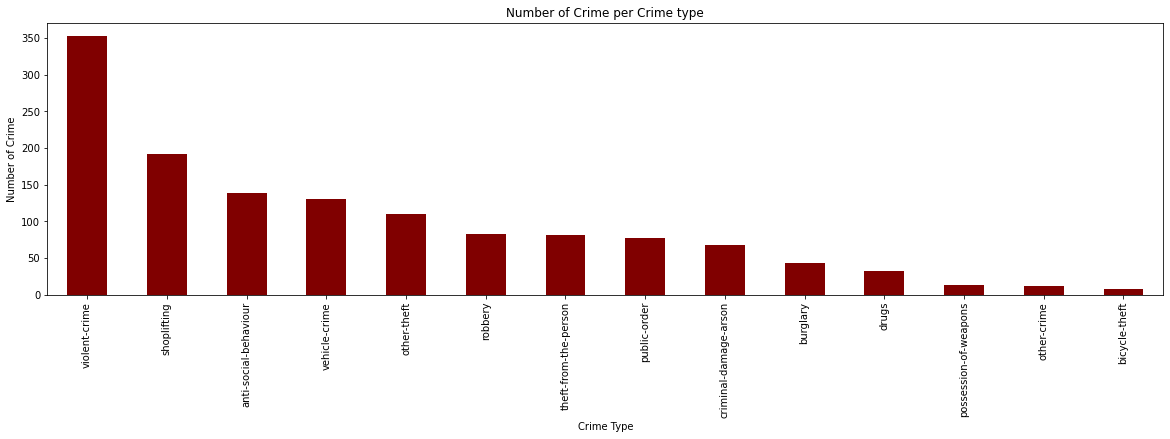

In [10]:
# Create a Pandas bar plot 
plot_crime = crime_count.plot.bar(color='maroon', figsize=(20,5))  


plt.xlabel("Crime Type")
plt.ylabel("Number of Crime")
plt.title("Number of Crime per Crime type")

In [11]:
# crime dates 
crime_dates = summary_table_df["Month"].value_counts()
crime_dates

2020-01    1339
Name: Month, dtype: int64

In [12]:
# the number of types of crimes in 1 mile radus of birmingham. IN DATA FORMATE
crime_outcome = summary_table_df["Outcome_status"].value_counts()
crime_outcome

Investigation complete; no suspect identified          706
Unable to prosecute suspect                            239
Court result unavailable                               130
Status update unavailable                               75
Offender given a caution                                19
Formal action is not in the public interest             16
Local resolution                                         5
Offender given a drugs possession warning                5
Action to be taken by another organisation               5
Further investigation is not in the public interest      1
Name: Outcome_status, dtype: int64

Text(0.5, 1.0, 'Number of Crime per Outcome type')

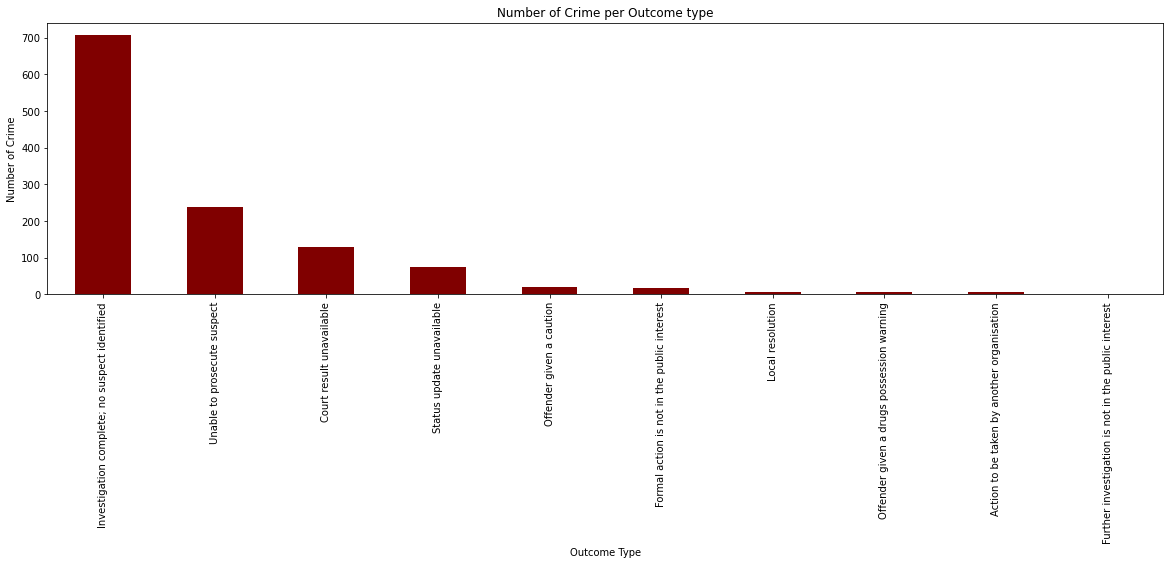

In [13]:
# Create a Pandas bar plot 
plot_outcome = crime_outcome.plot.bar(color='maroon', figsize=(20,5))  

plt.xlabel("Outcome Type")
plt.ylabel("Number of Crime")
plt.title("Number of Crime per Outcome type")

In [17]:
#creating the map 
crime_data = summary_table_df

my_maps = folium.Map(
    location = [52.46705703179184, -1.7719295917681033],
    zoom_start = 11
)

#defing the colours of each catergoy of crim 
def select_marker_color(row):
    if row ['Outcome_status'] == 'Investigation complete; no suspect identified' :
            return 'pink'
    if row ['Outcome_status'] == 'Under investigation':
        return 'purple'
    if row ['Outcome_status'] == 'Unable to prosecute suspect':
        return 'yellow'
    if row ['Outcome_status'] == 'Awaiting court outcome':
        return 'baby blue '
    if row ['Outcome_status'] == 'Local resolution':
        return 'green'
    if row ['Outcome_status'] == 'Action to be taken by another organisation':
        return 'orange'
    if row ['Outcome_status'] == 'Offender given a caution':
        return 'Maroon'

    #creating a the map     
crime_data['colour'] = crime_data.apply(select_marker_color, axis=1)
crime_data.head(3)

for _, crime in crime_data.iterrows():
     folium.Marker(
        location = [crime['Latitude'], crime['Longitude']],
        popup = crime ['Category'],
         tooltip = crime ['Category'],
         icon = folium.Icon(color = crime['colour'], preflix = 'fa', icon = 'circle')
     ).add_to(my_maps)

my_maps

/var/folders/g5/46fnvckx5g7cqt_7ggtz4h4r0000gn/T/ipykernel_56726/1629878460.py:35: UserWarning: color argument of Icon should be one of: {'green', 'lightgreen', 'purple', 'lightred', 'red', 'darkblue', 'blue', 'orange', 'darkred', 'gray', 'black', 'pink', 'cadetblue', 'lightgray', 'darkpurple', 'white', 'beige', 'lightblue', 'darkgreen'}.
  icon = folium.Icon(color = crime['colour'], preflix = 'fa', icon = 'circle')
